## İleri Toplulaştırma İşlemleri (aggregate, filter, transform, map, applymap, apply)

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'gruplar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                  columns = ['gruplar','degisken1','degisken2'])
df

,gruplar,degisken1,degisken2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


Her grup için tek bir değer elde etmek istiyorsanız **aggregate()** (veya kısayollarından birini) kullanın. Orijinal satırların bir alt kümesini almak istiyorsanız **filter()** kullanın. Ve her orijinal satır için yeni bir değer elde etmek istiyorsanız **transpose()** işlevini kullanın.

## aggregate() = agg()

Common Options:

* mean(): Compute mean of groups
* sum(): Compute sum of group values
* size(): Compute group sizes
* count(): Compute count of group
* std(): Standard deviation of groups
* var(): Compute variance of groups
* sem(): Standard error of the mean of groups
* describe(): Generates descriptive statistics
* first(): Compute first of group values
* last(): Compute last of group values
* nth() : Take nth value, or a subset if n is a list
* min(): Compute min of group values
* max(): Compute max of group values

In [2]:
df.agg({"degisken1" : [sum], "degisken2" : [min]})

,degisken1,degisken2
sum,198.0,NaN
min,NaN,100.0


In [50]:
df.groupby("gruplar").mean()   #  "gruplar"a göre gruplama işlemi yaptı ve mean ile toplulaştırdı

,degisken1,degisken2
gruplar,,
A,16.0,181.0
B,17.0,182.0
C,66.0,651.0


In [3]:
df.groupby("gruplar").aggregate(["min", np.median, max])                     # aggregate ile çoklu çağırma

# eger pandasın içinden fonk alıcaksan ya tırnakla yada tırnaksız yaz ("min", min)
# pandas dışındaki fonk larda "np.median" gibi yer aldığı kütüphane ile yazabiliriz

degisken1            degisken2            
              min median max       min median  max
gruplar                                           
A              10   16.0  22       100  181.0  262
B              11   17.0  23       111  182.0  253
C              33   66.0  99       333  651.0  969

In [55]:
df.groupby("gruplar").agg({"degisken1": "min", "degisken2": "max"})    # sonuçları isimlendirme 

,degisken1,degisken2
gruplar,,
A,10,262
B,11,253
C,33,969


## Filter

In [5]:
df

,gruplar,degisken1,degisken2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [9]:
df.filter(["degisken1","degisken2"])          # df[["degisken1","degisken2"]] aynı sonucu verir

,degisken1,degisken2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969


In [4]:
def filter_func(x):                      # degisken1'e göre standart sapmaları 9 dan büyük olan değerler hesaplandı
    return x["degisken1"].std() > 9     

In [5]:
df.groupby("gruplar").std()              # genel olarak direk standart sapmaların hepsini çıkardı 

,degisken1,degisken2
gruplar,,
A,8.485281,114.551299
B,8.485281,100.409163
C,46.669048,449.719913


In [7]:
df.groupby("gruplar").filter(filter_func)     # yani fonksiyon sayesinde (filter_func) belirtilen koşulu yerine getiricek
                                              # bu, pandasın bize sağladığı özelliği fonksiyon sayesinde arttırmadır

,gruplar,degisken1,degisken2
2,C,33,333
5,C,99,969


In [12]:
df.groupby("gruplar").filter(lambda x : x["degisken1"].mean() < 30)

,gruplar,degisken1,degisken2
0,A,10,100
1,B,23,253
3,A,22,262
4,B,11,111


## Transform

In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'gruplar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                    columns = ['gruplar','degisken1','degisken2'])
df

,gruplar,degisken1,degisken2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [24]:
df                        # transform vektörel çalışan bir fonksiyon yani sütün bazında

,gruplar,degisken1,degisken2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [14]:
df_a = df.iloc[:,1:3]     # gruplar kısmını almayarak ortalama hesabının yapılabilmesi için ön hazırlık yaptık
df_a                      # çünkü gruplar kısmı harf (stringlerden) oluşuyor

,degisken1,degisken2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969


In [18]:
df_a.transform(lambda x: x-x.mean())   # her bir değişkenden lambda ile kendisinden kendi ortalamasını çıkarması istendi

,degisken1,degisken2
0,-23.0,-238.0
1,-10.0,-85.0
2,0.0,-5.0
3,-11.0,-76.0
4,-22.0,-227.0
5,66.0,631.0


In [11]:
df_a.transform(lambda x: (x-x.mean()) / x.std())      # alternatif işlemler 

,degisken1,degisken2
0,-0.687871,-0.738461
1,-0.299074,-0.263736
2,0.000000,-0.015514
3,-0.328982,-0.235811
4,-0.657963,-0.704331
5,1.973890,1.957853


In [32]:
df

,gruplar,degisken1,degisken2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [19]:
df["degisken3"] = df.groupby("gruplar")["degisken1"].transform(sum)    # groupby üzerinden transform
df

,gruplar,degisken1,degisken2,degisken3
0,A,10,100,32
1,B,23,253,34
2,C,33,333,132
3,A,22,262,32
4,B,11,111,34
5,C,99,969,132


## Map()

In [38]:
# map seriler üzerinde çalışır apply ise hem seri hem de dataframe üzerinde çalışır 

In [20]:
df = pd.DataFrame({
    "name": ["Kevin", "Jack", "Mary", "Bob", "Robert", "Amy"],
    "score": [66, 75, 80, 93, 77, 81],
    "sex": ["M", "M", "F", "M", "M", "F"],
})
df

,name,score,sex
0,Kevin,66,M
1,Jack,75,M
2,Mary,80,F
3,Bob,93,M
4,Robert,77,M
5,Amy,81,F


In [31]:
df["say-hello"] = df["sex"].map({"M": "Hello, Mr.", "F": "Hello, Ms."})     # string ifadeler değiştirildi
df

,name,score,sex,say-hello,nick-name
0,Kevin,66,M,"Hello, Mr.",K
1,Jack,75,M,"Hello, Mr.",J
2,Mary,80,F,"Hello, Ms.",M
3,Bob,93,M,"Hello, Mr.",B
4,Robert,77,M,"Hello, Mr.",R
5,Amy,81,F,"Hello, Ms.",A


In [27]:
nick_name = pd.Series(['K', 'J', 'M', 'B', 'R', 'A'], index=df["name"])
     
nick_name                                                                 # dışarıdan tanımlanmış fonksiyon da alır 

name
Kevin     K
Jack      J
Mary      M
Bob       B
Robert    R
Amy       A
dtype: object

In [28]:
df["nick-name"] = df["name"].map(nick_name)                               # seri'yi map üzerinden yeni sütun olarak ekledik
df  

,name,score,sex,say-hello,nick-name
0,Kevin,66,M,"Hello, Mr.",K
1,Jack,75,M,"Hello, Mr.",J
2,Mary,80,F,"Hello, Ms.",M
3,Bob,93,M,"Hello, Mr.",B
4,Robert,77,M,"Hello, Mr.",R
5,Amy,81,F,"Hello, Ms.",A


In [42]:
df["say-hello-msg"] = df["name"].map(lambda x: f"Hello, {x}!")    # lambda ile kullanım, dikkat edilirse hep seri üzerinde çalışıldı
df

,name,score,sex,say-hello,nick-name,say-hello-msg
0,Kevin,66,M,"Hello, Mr.",K,"Hello, Kevin!"
1,Jack,75,M,"Hello, Mr.",J,"Hello, Jack!"
2,Mary,80,F,"Hello, Ms.",M,"Hello, Mary!"
3,Bob,93,M,"Hello, Mr.",B,"Hello, Bob!"
4,Robert,77,M,"Hello, Mr.",R,"Hello, Robert!"
5,Amy,81,F,"Hello, Ms.",A,"Hello, Amy!"


## applymap()

In [43]:
# applymap her eleman ozelinde islem yapiyor
# applymap de map'in tam tersi sadece dataframe üzerinde çalışır 
# apply her ikisinde de çalışabiliyordu 
# applymap'in apply dan en önemli farkı daha performanslı çalışmasıdır

In [32]:
df = pd.DataFrame({
    "name": ["Kevin", "Jack", "Mary", "Bob", "Robert", "Amy"],
    "score": [66, 75, 80, 93, 77, 81],
    "sex": ["m", "m", "f", "m", "m", "f"],
})
df

,name,score,sex
0,Kevin,66,m
1,Jack,75,m
2,Mary,80,f
3,Bob,93,m
4,Robert,77,m
5,Amy,81,f


In [35]:
df[["name", "sex"]] = df[["name", "sex"]].applymap(lambda x: x.upper())
df

,name,score,sex
0,KEVIN,66,M
1,JACK,75,M
2,MARY,80,F
3,BOB,93,M
4,ROBERT,77,M
5,AMY,81,F


**DataFrame:**

**apply()** yöntemi, birden fazla sütun veya satır üzerinde karmaşık işlem uygulamak için kullanılır.
Bir sütun veya birden fazla sütun: axis=1 bir satır veya birden fazla satır: axis=0

**applymap()** metodu tüm DataFrame üzerinde eleman bazında işlem yapmak için kullanılır.

**Series:**

**apply()** metodu, Serilerin değerleri üzerinde karmaşık işlemler uygulamak için kullanılır.

**map()** yöntemi, Serinin her bir değerini bazı kurallara veya yazışmalara dayalı olarak başka bir değerle eşlemek için kullanılır.

## apply()

In [18]:
# apply satir ya da sutun bazinda islem yapabilen ve toplulaştırma amacıyla kullanılan bir fonksiyondur

In [36]:
df = pd.DataFrame({
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                  columns = ['degisken1','degisken2'])
df

,degisken1,degisken2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969


In [37]:
df.degisken1.apply(np.sum)       # tek bir sütun üzerinde kullanım

0    10
1    23
2    33
3    22
4    11
5    99
Name: degisken1, dtype: int32

In [3]:
df.apply(np.sum)                  # tüm sütunlarda kullanım

degisken1     198
degisken2    2028
dtype: int64

In [78]:
df.apply(np.mean)

degisken1     33.0
degisken2    338.0
dtype: float64

In [21]:
np.sum(df)                        # vektörize bir işlem üzerinden apply ile aynı sonuç
                                  # numpy içindeki komutlar vektörize bir halde çalışır bu da hız avantajı sağlar

degisken1     198
degisken2    2028
dtype: int64

In [22]:
np.sum(df["degisken1"]) 

198

In [38]:
df.applymap(np.sum)         # applymap ile yukarıdaki "df.apply(np.sum)" gibi sonuç alamadım

,degisken1,degisken2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969


In [42]:
df.apply(lambda x: len(str(x)),axis = 0)          # apply lambda ile toplulaştırılmış sonuç döndürdü

degisken1    77
degisken2    83
dtype: int64

In [40]:
df.applymap(lambda x: len(str(x)))       # applymap'in yukarıdakinden farkı satır satır sonuç döndürdü

,degisken1,degisken2
0,2,3
1,2,3
2,2,3
3,2,3
4,2,3
5,2,3


In [13]:
df.degisken1.apply(lambda x: len(str(x)))        # bu formatta tek bir sütun için applymap'e benzer bir sonuç aldık

0    2
1    2
2    2
3    2
4    2
5    2
Name: degisken1, dtype: int64

### apply(fonksiyon) & apply(lambda)

In [31]:
def times3(x):
    return x * 3

df.degisken1 = df.degisken1.apply(times3)      # apply'a dışarıdan tanımlanmış bir fonksiyon çağrıldı
df

,gruplar,degisken1,degisken2
0,A,30,100
1,B,69,253
2,C,99,333
3,A,66,262
4,B,33,111
5,C,297,969


In [33]:
df.degisken2 = df.degisken2.apply(lambda x : x * 3)    # lambda'nın avantajı hafızada yer tutmuyor ama yukarıda ki def tutuyor
df                                                     # lamda geçici bir fonksiyon ve daha pratik bir kullanıma sahip

,gruplar,degisken1,degisken2
0,A,30,900
1,B,69,2277
2,C,99,2997
3,A,66,2358
4,B,33,999
5,C,297,8721


In [34]:
# apply işlemininin sonucu ile yeni bir sütun oluşturalım

In [35]:
df["class_"] = df["gruplar"].apply(lambda x : "First" if x == "A" else ("Second" if x == "B" else "Third"))
df

,gruplar,degisken1,degisken2,class_
0,A,30,900,First
1,B,69,2277,Second
2,C,99,2997,Third
3,A,66,2358,First
4,B,33,999,Second
5,C,297,8721,Third


In [36]:
def new_column(x):
    if x == "A":
        return "First"
    elif x == "B":
        return "Second"
    else:
        return "Third"

In [37]:
df["class_"] = df["gruplar"].apply(new_column)
df

,gruplar,degisken1,degisken2,class_
0,A,30,900,First
1,B,69,2277,Second
2,C,99,2997,Third
3,A,66,2358,First
4,B,33,999,Second
5,C,297,8721,Third


## apply ve transform farkı

In [43]:
dff = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
dff

,A,B
0,1,10
1,2,20
2,3,30


In [44]:
dff.apply(lambda x: x+10)

,A,B
0,11,20
1,12,30
2,13,40


In [45]:
dff.transform(lambda x: x+10)       # her bir eleman için işlemi gerçekleştirdi           

,A,B
0,11,20
1,12,30
2,13,40


In [46]:
dff.apply(lambda x: x.sum())

A     6
B    60
dtype: int64

In [47]:
df.transform(lambda x: x.sum())      # transform apply gibi toplu sonuçlar üretemez (fark 1)

ValueError: Function did not transform

In [51]:
df = pd.DataFrame({
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                  columns = ['degisken1','degisken2'])
df

,degisken1,degisken2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969


In [52]:
def subtract_two(x):
    return x['degisken1'] - x['degisken2']

In [53]:
df.apply(subtract_two, axis=1)

0    -90
1   -230
2   -300
3   -240
4   -100
5   -870
dtype: int64

In [54]:
df.transform(subtract_two, axis=1)      # apply() aynı anda birden fazla Seri ile çalışır. Ancak, transform() 
                                        # aynı anda yalnızca tek bir Seri ile çalışmasına izin verilir.  (fark 2)

ValueError: Function did not transform

In [55]:
df.transform([np.sqrt, np.exp])

degisken1                degisken2               
       sqrt           exp       sqrt            exp
0  3.162278  2.202647e+04  10.000000   2.688117e+43
1  4.795832  9.744803e+09  15.905974  7.524955e+109
2  5.744563  2.146436e+14  18.248288  4.169294e+144
3  4.690416  3.584913e+09  16.186414  6.097534e+113
4  3.316625  5.987414e+04  10.535654   1.609487e+48
5  9.949874  9.889030e+42  31.128765            inf

In [56]:
df.apply([np.sqrt, np.exp])                       # ikiside birden fazla numpy işlevini yerine getirdi

degisken1                degisken2               
       sqrt           exp       sqrt            exp
0  3.162278  2.202647e+04  10.000000   2.688117e+43
1  4.795832  9.744803e+09  15.905974  7.524955e+109
2  5.744563  2.146436e+14  18.248288  4.169294e+144
3  4.690416  3.584913e+09  16.186414  6.097534e+113
4  3.316625  5.987414e+04  10.535654   1.609487e+48
5  9.949874  9.889030e+42  31.128765            inf

In [57]:
df = pd.DataFrame({'gruplar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'degisken1':[10,23,33,22,11,99],
                   'degisken2':[100,253,333,262,111,969]},
                  columns = ['gruplar','degisken1','degisken2'])
df

,gruplar,degisken1,degisken2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969


In [58]:
df.groupby("gruplar").degisken1.apply(np.sum)

gruplar
A     32
B     34
C    132
Name: degisken1, dtype: int64

In [59]:
df.groupby("gruplar").degisken1.transform(np.sum)    # transform seri ile aynı uzunlukta sonuç döndürür 
                                                     # applay ise groupby'a bağlı uzunlukta sonuç döndürdü  (fark 3)

0     32
1     34
2    132
3     32
4     34
5    132
Name: degisken1, dtype: int64

In [60]:
df.groupby("gruplar").apply(lambda x: x['degisken2'] - x['degisken1'])      # apply groupby üzerinde birden fazla seri ile çalışabilir

gruplar   
A        0     90
         3    240
B        1    230
         4    100
C        2    300
         5    870
dtype: int64

In [61]:
df.groupby("gruplar").transform(lambda x: x['degisken2'] - x['degisken1'])   # transform groupby üzerinde birden fazla seri ile çalışamaz

KeyError: 'degisken2'

## Pivot Tablolar (pivot() vs pivot_table())

In [29]:
# veri setleri üzerinde bazı satır ve sütün işlemleri yaparak veri setini amaca uygun hale getirmek için kullanılan yapılardır 
# groupby'ın çok boyutlu hali olarak düşünebiliriz

In [24]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}

df = pd.DataFrame(data)
df

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [25]:
df.pivot_table(index= "gender", columns="sport", values= ["age"], aggfunc="mean")

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [27]:
df.pivot_table(index= "gender", columns="sport", values= ["age", "weight", "height"])       # pivot_table

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [28]:
df.pivot(index= "gender", columns="sport", values= ["age", "weight", "height"])             # pivot

age                               weight                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0       62.0      NaN   58.0   
male         21.0     23.0   20.0       NaN       90.0     80.0   83.0   

                     height                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female      65.0      175.0      NaN  172.0     182.0  
male         NaN      196.0    178.0  185.0       NaN

In [29]:
df.pivot(index= "gender", columns="sport", values= ["age", "weight", "height"], aggfunc="mean")   # aggfunc hata verdi 

TypeError: pivot() got an unexpected keyword argument 'aggfunc'

In [ ]:
# pivot'ta arkaplanda aggfunc methodu olmadigi icin hata cikiyor 
# pivot_table pivotun daha genellestirilmis hali

In [14]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
titanic.sex.unique()                   # değişkenin eşsiz değerleri

array(['male', 'female'], dtype=object)

In [58]:
titanic.sex.value_counts()             # değişkenin eşsiz değerlerinin toplam sayıları

male      577
female    314
Name: sex, dtype: int64

In [37]:
titanic.groupby("sex")[["survived"]].mean()              # 1. yol groupby

# önce cinsiyete göre gruplayıp sağ kalma durumlarını ifade eden survived incelemesi

,survived
sex,
female,0.742038
male,0.188908


In [40]:
titanic[["survived","sex"]].groupby("sex").mean()         # 2. yol groupby 

,survived
sex,
female,0.742038
male,0.188908


In [38]:
titanic.groupby(["sex","class"])["survived"].aggregate("mean").unstack()     # groupby aracılığıyla pivat işlemi

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [42]:
titanic.groupby(["sex","class"])[["survived"]].aggregate("mean")  

# unstack eklenmeden (unstack hiyerarşik index yapısını çözer)

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [36]:
# pivot ile table

In [15]:
titanic.pivot_table("survived",index = "sex", columns = "class")     # daha kolay yöntemi

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
titanic.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [16]:
age = pd.cut(titanic["age"],[0,18,90])       # cut, değişkenimizi istediğimiz aralıkta böler
age.head(10)

0    (18.0, 90.0]
1    (18.0, 90.0]
2    (18.0, 90.0]
3    (18.0, 90.0]
4    (18.0, 90.0]
5             NaN
6    (18.0, 90.0]
7     (0.0, 18.0]
8    (18.0, 90.0]
9     (0.0, 18.0]
Name: age, dtype: category
Categories (2, interval[int64, right]): [(0, 18] < (18, 90]]

In [19]:
titanic.pivot_table("survived", ["sex",age], "class")   # kendi oluşturduğumuz kategorik değişkeni(age) tabloya eklemiş olduk

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 90]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 90]  0.375000  0.071429  0.133663

## Eksik Veri Gözlemi

np.nan, belirsiz veya tanımlanamaz sayısal değerleri temsil etmek için kullanılır.

np.nan değeri, "sentinel" bir değer olarak kabul edilir ve herhangi bir değerle, hatta kendisiyle bile karşılaştırılamaz.

Sentinel; matematiksel hesaplamalarda belirsiz veya tanımlanamaz değerleri temsil etmek için kullanılır.

None; sentinel bir değerdir ve bir fonksiyonun veya metodun "boş" veya "tanımsız" bir değeri ifade etmesi için kullanılır.

Sütunun data tipi object ise "nan", sayısal ise "NaN" olur.

#### örnek-1

In [30]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])          # arada eksik değerler manuel girildi
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [21]:
df.isna()                    # eksik değerleri True False bazında gösterir

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [5]:
df.isna().sum()                 # sütun bazında eksik veri sayısını verir

V1    2
V2    3
V3    2
dtype: int64

In [6]:
df.isnull().sum()               # yukarıdakinle aynı çıktıyı verir 

V1    2
V2    3
V3    2
dtype: int64

In [8]:
df.notna().sum()                # eksik veri dışında kalan dolu satırların sayısını verir

V1    7
V2    6
V3    7
dtype: int64

In [13]:
df.notnull().sum()              # yukarıdakinle aynı çıktıyı verir

V1    7
V2    6
V3    7
dtype: int64

In [31]:
df.isnull().any()           # herhangi bir satirda null varsa true, yoksa false

V1    True
V2    True
V3    True
dtype: bool

In [32]:
df.isnull().any(axis=1)     # satirlarda sutun sutun bakacak, bir tane bile null varsa True doner

0     True
1     True
2    False
3     True
4    False
5     True
6     True
7    False
8    False
dtype: bool

In [10]:
df[df.V1.notna()]                # sadece V1 de eksik veri içermeyen satırları verir

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [11]:
df[df.V1.isna()]                 # V1 de eksik veri içeren satırları verir

,V1,V2,V3
3,NaN,8.0,6.0
6,NaN,NaN,NaN


In [12]:
df[(df.V2.isna()) & (df.V3.notna())]     # V2'de eksik olan ama V3 de eksik olmayan satırları verir

,V1,V2,V3
1,3.0,NaN,12.0
5,1.0,NaN,7.0


In [ ]:
# axis = 0 satır 
# axis = 1 sütun üzerinden işlem

# df.dropna(how = "any") = df.dropna()     herhangi bir sütunda nan varsa o satırı siler     
# df.dropna(how = "all")                   tüm sütünlarda o satır nan ise silinir
# df.dropna(how = "all". axis = 1)         tüm sütun nan ise o sütun silinir

# df.dropna(thresh = 1)              # 1 tane bile nan olmayan değer varsa tut silme 
# df.dropna(thresh = 3)              # sadece 1 veya 2 tane değeri olup gerisi nan olan satırları siler çünkü eşik 3

# df.V2.fillna(x)                 # girdiğim x değeri o nan değerlere atanır
# df.V2.fillna(df.V2.mean())      # nan değerler V2'nin ortalaması ile doldurulur

# df.apply(lambda x: x.fillna(x.mean()), axis = 0)    apply ile eksik olan tüm değerler kendi sütun ortalamaları ile dolar

#### örnek-2

In [60]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


#### yanlış değrlerin nan dönüşümü

In [61]:
# yanlış değerleri NaN değerlerine dönüştürme

In [62]:
df["status"] = df["status"].replace(to_replace="-", value=np.nan)               # object sütun 

In [63]:
df["var1"] = df["var1"].replace(to_replace="-", value=np.nan).astype("float")   # nümeric sütun için astype dönüşümü

In [64]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


#### drop işlemi

In [39]:
df.dropna(axis=0, how="any", inplace=False)          # satır da herhangi bir nan varsa siler 

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [65]:
df.dropna(axis=1, thresh=9)                          # sütunda 9'un altında notnull varsa o sütunu siler 

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [69]:
df.dropna(axis="rows", thresh=6)                     # satırda 6'nın altında notnull varsa o satırı sile

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [41]:
df.dropna(axis=1, how="any", inplace=False)          # sütünda bir tane bile non varsa sütunu komple siler 

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [42]:
df.drop(["var1", "var2"], axis=1)              # istediğimiz sütünları direk silme işlemi        

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


#### nümeric sütunlarda doldurma işlemi

In [43]:
df.fillna(0)                             # tüm nan yerine 0 atanır

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [44]:
df[["var1"]].fillna(0)        # istediğimiz sütunda atama işlemi 

,var1
0,2.0
1,3.0
2,5.0
3,0.0
4,7.0
5,1.0
6,0.0
7,10.0
8,14.0
9,0.0


In [45]:
df[["var1"]].fillna(df["var1"].mean())     # atama işlemi için mean, median kullanabiliriz

,var1
0,2.0
1,3.0
2,5.0
3,6.0
4,7.0
5,1.0
6,6.0
7,10.0
8,14.0
9,6.0


In [46]:
df.mean()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17812\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [47]:
df.fillna(df.mean())     # nümeric sütunlar için her sütunun ortalaması ile atama işlemi

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_17812\634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [48]:
df.fillna({"dept": "Other", "var1": df.var1.mean(), "var2": df.var2.median()})    # sözlük ile çeşitli atama işlemleri

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,Other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,Other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


#### kategorik sütunlarda doldurma işlemi

In [49]:
df.dept.mode()                  # en çok tekrara göre sıralar

0    AWS
1     DS
2     FS
Name: dept, dtype: object

In [50]:
df.dept.mode()[0]

'AWS'

In [51]:
df.dept.fillna(df.dept.mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [52]:
df.dept.fillna(method="bfill")    # bir önceki değer ile doldurma

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [53]:
df.dept.fillna(method="ffill")    # bir sonraki değer ile doldurma

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

## cut & qcut 

In [47]:
pd.cut(titanic["age"], bins = 3)                # min-max arasında 3 eşit parçaya böler

0        (0.34, 26.947]
1      (26.947, 53.473]
2        (0.34, 26.947]
3      (26.947, 53.473]
4      (26.947, 53.473]
             ...       
886    (26.947, 53.473]
887      (0.34, 26.947]
888                 NaN
889      (0.34, 26.947]
890    (26.947, 53.473]
Name: age, Length: 891, dtype: category
Categories (3, interval[float64, right]): [(0.34, 26.947] < (26.947, 53.473] < (53.473, 80.0]]

In [49]:
pd.cut(titanic["age"], bins = 3, labels = ["young","middle age","older"])       # isimlendirme

0           young
1      middle age
2           young
3      middle age
4      middle age
          ...    
886    middle age
887         young
888           NaN
889         young
890    middle age
Name: age, Length: 891, dtype: category
Categories (3, object): ['young' < 'middle age' < 'older']

In [48]:
pd.cut(titanic["age"], bins = [0,18,45,90])       # benim istediğim aralıkta böler

0      (18.0, 45.0]
1      (18.0, 45.0]
2      (18.0, 45.0]
3      (18.0, 45.0]
4      (18.0, 45.0]
           ...     
886    (18.0, 45.0]
887    (18.0, 45.0]
888             NaN
889    (18.0, 45.0]
890    (18.0, 45.0]
Name: age, Length: 891, dtype: category
Categories (3, interval[int64, right]): [(0, 18] < (18, 45] < (45, 90]]

<AxesSubplot:>

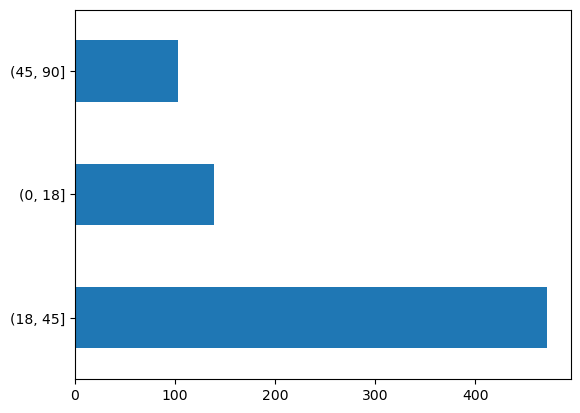

In [51]:
pd.cut(titanic["age"], bins = [0,18,45,90]).value_counts().plot(kind = "barh")

In [ ]:
# istediğim aralıkta böldü ama dağılımlar eşit değil

In [50]:
pd.qcut(titanic.age, q = 3)           # verilerin ayrımını eşit sayıda yapar

0      (0.419, 23.0]
1       (34.0, 80.0]
2       (23.0, 34.0]
3       (34.0, 80.0]
4       (34.0, 80.0]
           ...      
886     (23.0, 34.0]
887    (0.419, 23.0]
888              NaN
889     (23.0, 34.0]
890     (23.0, 34.0]
Name: age, Length: 891, dtype: category
Categories (3, interval[float64, right]): [(0.419, 23.0] < (23.0, 34.0] < (34.0, 80.0]]

<AxesSubplot:>

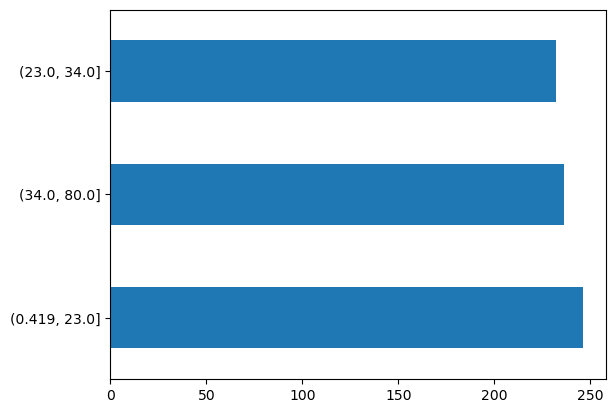

In [52]:
pd.qcut(titanic.age, q = 3).value_counts().plot(kind = "barh")

In [53]:
# qcut bölünmeleri eşit sayıda olucak şekilde ayırdı

In [54]:
pd.qcut(titanic.age, q = 4, labels = ["newer","medium","not so old","oldest"])        # isimlendirme

0          medium
1      not so old
2          medium
3      not so old
4      not so old
          ...    
886        medium
887         newer
888           NaN
889        medium
890    not so old
Name: age, Length: 891, dtype: category
Categories (4, object): ['newer' < 'medium' < 'not so old' < 'oldest']

**özetle:**
    
**cut** bins değeri ile min-max aralığını eşit parçaya böler ama her bölme eşit sayıda gözleme sahip olmayabilir

**qcut** ise q değeri ile veri dağılımı eşit olucak şekilde böler ancak burda bölünme sınırları orantısız olucaktır